# Information System Solutions and Design (2250)

# Assignment 3: Data Science Project

## Nushura Islam (s3796107)

## Phase 3: Data Cleaning

# Importing libraries

In [1]:
# Importing numpy as it assists in doing rapid mathematical operations 
import numpy as np

# Importing pandas which is built on top of numpy
import pandas as pd

# Importing SimpleImputer to assign missing values 
from sklearn.impute import SimpleImputer

# For graph plotting purposes importing matplotlib
import matplotlib.pyplot as plt 
# This will further help to plot graphs within the notebook
%matplotlib inline 

# Importing seaborn which is built on top of matplotlib
import seaborn as sns 

# Importing joblib library for saving a python object to file
import joblib

# Loading and checking data 

In [2]:
# Checking and storing missing values in the variable called 'missing_values'
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-']

# Loading the personal loan dataframe from computer and 
# Also checking and converting the missing values characteres to NA format
# If the delimiter is not in the standard comma separated format the it will be 
personal_loan_df = pd.read_csv("personal-loan.csv", na_values=missing_values)
personal_loan_df

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5440,36.0,4.0,1.0,Undergraduate,72.0,0,no,0.0,0,0,yes,no
5996,1251,56.0,25.0,2.0,Undergraduate,110.0,0,no,0.0,0,0,no,no
5997,2454,34.0,11.0,2.0,Advanced or Professional,57.0,0,no,0.0,1,0,yes,no
5998,1435,30.0,NaN,2.0,Undergraduate,85.0,81,no,0.0,0,0,yes,no


In [3]:
# Checking the type of object
type(personal_loan_df)

# The output confirms that the data set has been successfully 
# loaded into a dataframe object

pandas.core.frame.DataFrame

In [4]:
personal_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   object 
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   object 
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   object 
 12  personal_loan       6000 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 609.5+ KB


### Finding the number of rows and columns the data set has

In [5]:
# Using the hsape attribute to do the calculation
print(personal_loan_df.shape)
print(personal_loan_df.shape[0]) # Rows
print(personal_loan_df.shape[1]) # Columns

# It can be concluded that there are 6000 rows and 13 columns present in the dataset

(6000, 13)
6000
13


In [6]:
# Displaying the first 20 rows of the data set
personal_loan_df.head(20)

# It can be observed by looking at the dataframe printed below 
# that there are not a number (NaN) values present within the set.

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no
5,4491,44.0,18.0,3.0,Advanced or Professional,49.0,0,no,0.0,0,0,yes,no
6,706,42.0,16.0,4.0,Advanced or Professional,23.0,0,no,0.0,0,0,yes,no
7,5327,64.0,38.0,2.0,Undergraduate,112.0,0,no,0.0,0,0,no,no
8,5269,43.0,7.0,4.0,Graduate,28.0,83,yes,0.9,0,0,yes,no
9,1918,25.0,8.0,1.0,Undergraduate,47.0,0,no,0.0,0,0,no,no


In [7]:
# Checking the data types of each columns
personal_loan_df.dtypes

customer_id             int64
age                   float64
yrs_experience        float64
family_size           float64
education_level        object
income                float64
mortgage_amt            int64
credit_card_acct       object
credit_card_spend     float64
share_trading_acct      int64
fixed_deposit_acct      int64
online_acct            object
personal_loan          object
dtype: object

In [8]:
personal_loan_df['personal_loan'] = personal_loan_df['personal_loan'].replace('no',0)
personal_loan_df['personal_loan'] = personal_loan_df['personal_loan'].replace('yes',1)
personal_loan_df.head(10)

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,0
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,0
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,1
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,0
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,0
5,4491,44.0,18.0,3.0,Advanced or Professional,49.0,0,no,0.0,0,0,yes,0
6,706,42.0,16.0,4.0,Advanced or Professional,23.0,0,no,0.0,0,0,yes,0
7,5327,64.0,38.0,2.0,Undergraduate,112.0,0,no,0.0,0,0,no,0
8,5269,43.0,7.0,4.0,Graduate,28.0,83,yes,0.9,0,0,yes,0
9,1918,25.0,8.0,1.0,Undergraduate,47.0,0,no,0.0,0,0,no,0


# Deleting duplicate rows

In [9]:
# Checking the number of rows before trying to drop any duplicated rows
print(personal_loan_df.shape)

# Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
personal_loan_df.drop_duplicates(inplace=True) # will keep first copy

# Checking the number of rows after trying to drop any duplicated rows
print(personal_loan_df.shape)

(6000, 13)
(6000, 13)


#### The result of the previous cell indicates that no rows dropped which means there are not duplicated rows.

# Handle missing data

Calculating the amount of missing values

In [10]:
# Sum of missing values (NaN) in the whole dataframe per column
personal_loan_df.isnull().sum()

# It can be observed from the result that there are close to 400 null values

customer_id             0
age                   380
yrs_experience        364
family_size           385
education_level         0
income                377
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
dtype: int64

In [11]:
# Finding the percentage of missing values (NaN) per column
percent_missing = round(personal_loan_df.isna().mean() * 100, 4)
print(percent_missing)

# The result shows that percentage wise there is six percent missing values

customer_id           0.0000
age                   6.3333
yrs_experience        6.0667
family_size           6.4167
education_level       0.0000
income                6.2833
mortgage_amt          0.0000
credit_card_acct      0.0000
credit_card_spend     0.0000
share_trading_acct    0.0000
fixed_deposit_acct    0.0000
online_acct           0.0000
personal_loan         0.0000
dtype: float64


Dropping all rows with missing values

In [12]:
# Dropping all rows where at least one record is missing
personal_loan_df.dropna(inplace=True)

# Then printing the shape to check the amount of rows that were dropped.
print(personal_loan_df.shape)


(5410, 13)


It can be observed that the number of rows dropped from 6000 to 5410.
This method of dropping rows is justified because the amount of rows dropped is not much and there is still a lot of data available to do the analysis on.

# Handling outliers

In [13]:
personal_loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,5410.0,3038.500739,1717.697577,3.0,1575.5,3054.5,4511.0,6000.0
age,5410.0,45.046580,12.551335,23.0,34.0,45.0,56.0,92.0
yrs_experience,5410.0,20.602033,12.419831,0.0,10.0,21.0,31.0,64.0
family_size,5410.0,2.421442,1.138505,1.0,1.0,2.0,3.0,7.0
income,5410.0,86.360259,45.416852,8.0,52.0,82.0,117.0,223.0
mortgage_amt,5410.0,68.638447,88.943678,0.0,0.0,0.0,126.0,617.0
credit_card_spend,5410.0,0.593530,1.332406,0.0,0.0,0.0,0.4,9.5
share_trading_acct,5410.0,0.098521,0.298046,0.0,0.0,0.0,0.0,1.0
fixed_deposit_acct,5410.0,0.082994,0.275899,0.0,0.0,0.0,0.0,1.0
personal_loan,5410.0,0.166359,0.372437,0.0,0.0,0.0,0.0,1.0


Creating all the box-plots within a single code cell.
Each box-plot contains all the seven numerical variables which were appropiate to be plotted into a box-plot. 

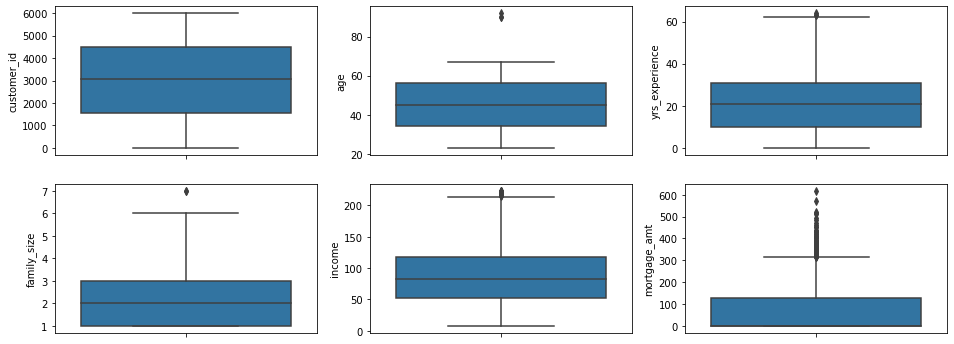

In [14]:
fig, ax = plt.subplots(2,3, figsize=(16,6))  # 2 rows and 4 columns

# Row 0
ax1 = sns.boxplot(y=personal_loan_df["customer_id"], ax=ax[0,0]) # row 0, col 0
ax2 = sns.boxplot(y=personal_loan_df["age"], ax=ax[0,1]) 
ax3 = sns.boxplot(y=personal_loan_df["yrs_experience"], ax=ax[0,2])

# Row 1
ax4 = sns.boxplot(y=personal_loan_df["family_size"], ax=ax[1,0])
ax5 = sns.boxplot(y=personal_loan_df["income"], ax=ax[1,1])
ax6 = sns.boxplot(y=personal_loan_df["mortgage_amt"], ax=ax[1,2])

plt.savefig('outliers_box-plots-side-by-side.png', dpi=300) # dpi=300 is print quality

In [15]:
# Finding the percentages of outlier per columns

columns = ['customer_id', 'age', 'yrs_experience', 
           'family_size', 'income', 'mortgage_amt']
print(columns)
print()


for col in columns:
    
    # 25th percentile
    percentile_25 = personal_loan_df[col].quantile(0.25)
    # 75th percentile
    percentile_75 = personal_loan_df[col].quantile(0.75)
    
    # Inter Quartile Range
    iqr = percentile_75 - percentile_25 
    
    total = len(personal_loan_df[col])

    # Determine the upper and lower boundaries for outliers
    # The lower boundaries are less than the bottom whisker 
    # The upper boundaries are greater than the top whisker
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper}")

    # Count all values that are less than the lower boundary OR 
    # those that are greater than the upper boundary
    num_outliers = len(personal_loan_df[(personal_loan_df[col] < lower) | (personal_loan_df[col] > upper)])
    
    # Percentage of outliers
    pc_outliers = round(num_outliers*100/total,2)
    
    print(f"Num outliers: {num_outliers}, total rows: {total}, percent: {pc_outliers}")
    print()    

['customer_id', 'age', 'yrs_experience', 'family_size', 'income', 'mortgage_amt']

col: customer_id, lower: -2827.75, upper: 8914.25
Num outliers: 0, total rows: 5410, percent: 0.0

col: age, lower: 1.0, upper: 89.0
Num outliers: 3, total rows: 5410, percent: 0.06

col: yrs_experience, lower: -21.5, upper: 62.5
Num outliers: 3, total rows: 5410, percent: 0.06

col: family_size, lower: -2.0, upper: 6.0
Num outliers: 2, total rows: 5410, percent: 0.04

col: income, lower: -45.5, upper: 214.5
Num outliers: 16, total rows: 5410, percent: 0.3

col: mortgage_amt, lower: -189.0, upper: 315.0
Num outliers: 72, total rows: 5410, percent: 1.33



The column, customer_id did not have any outliers. The highest number of outliers present are inside the credit_card_spend. The lowest number of outliers present are within family_size.

In [16]:
columns = ['customer_id', 'age', 'yrs_experience', 
           'family_size', 'income', 'mortgage_amt']
print(columns)
print()


for col in columns:
    #median
    median_value = personal_loan_df[col].quantile(0.50)
    
    # 25th percentile
    percentile_25 = personal_loan_df[col].quantile(0.25)
    # 75th percentile
    percentile_75 = personal_loan_df[col].quantile(0.75)
    
    # Inter Quartile Range
    iqr = percentile_75 - percentile_25 
    
    # Determine the upper and lower boundaries for outliers
    # The lower boundaries are less than the bottom whisker 
    # The upper boundaries are greater than the top whisker
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper}, median_val: {median_value}")
    
    print()
    
    personal_loan_df[col] = np.where((personal_loan_df[col] < lower) | (personal_loan_df[col] > upper), median_value, personal_loan_df[col])
    
personal_loan_df.describe().T

['customer_id', 'age', 'yrs_experience', 'family_size', 'income', 'mortgage_amt']

col: customer_id, lower: -2827.75, upper: 8914.25, median_val: 3054.5

col: age, lower: 1.0, upper: 89.0, median_val: 45.0

col: yrs_experience, lower: -21.5, upper: 62.5, median_val: 21.0

col: family_size, lower: -2.0, upper: 6.0, median_val: 2.0

col: income, lower: -45.5, upper: 214.5, median_val: 82.0

col: mortgage_amt, lower: -189.0, upper: 315.0, median_val: 0.0



,count,mean,std,min,25%,50%,75%,max
customer_id,5410.0,3038.500739,1717.697577,3.0,1575.5,3054.5,4511.0,6000.0
age,5410.0,45.021257,12.505222,23.0,34.0,45.0,56.0,67.0
yrs_experience,5410.0,20.578558,12.378969,0.0,10.0,21.0,31.0,62.0
family_size,5410.0,2.419593,1.135123,1.0,1.0,2.0,3.0,6.0
income,5410.0,85.955638,44.840432,8.0,52.0,82.0,116.0,213.0
mortgage_amt,5410.0,63.481146,80.891114,0.0,0.0,0.0,121.0,314.0
credit_card_spend,5410.0,0.593530,1.332406,0.0,0.0,0.0,0.4,9.5
share_trading_acct,5410.0,0.098521,0.298046,0.0,0.0,0.0,0.0,1.0
fixed_deposit_acct,5410.0,0.082994,0.275899,0.0,0.0,0.0,0.0,1.0
personal_loan,5410.0,0.166359,0.372437,0.0,0.0,0.0,0.0,1.0


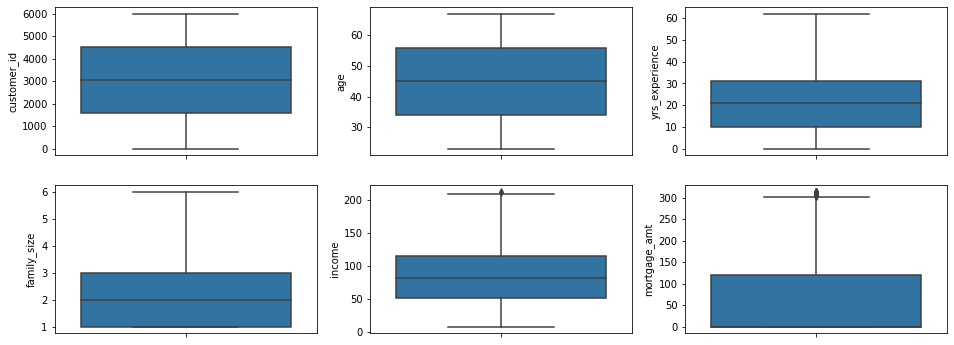

In [17]:
fig, ax = plt.subplots(2,3, figsize=(16,6))  # 2 rows and 4 columns

# Row 0
ax1 = sns.boxplot(y=personal_loan_df["customer_id"], ax=ax[0,0]) # row 0, col 0
ax2 = sns.boxplot(y=personal_loan_df["age"], ax=ax[0,1]) 
ax3 = sns.boxplot(y=personal_loan_df["yrs_experience"], ax=ax[0,2])

# Row 1
ax4 = sns.boxplot(y=personal_loan_df["family_size"], ax=ax[1,0])
ax5 = sns.boxplot(y=personal_loan_df["income"], ax=ax[1,1])
ax6 = sns.boxplot(y=personal_loan_df["mortgage_amt"], ax=ax[1,2])

Text(0.5, 1.0, 'Income Boxplot')

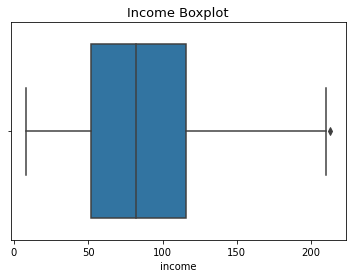

In [18]:
# The income box-plot seemed to still contain some outliers
sns.boxplot(x=personal_loan_df["income"])

# Title table
plt.title('Income Boxplot', fontsize=13)


In [19]:
#  Hence, to remove that, the code below is use
#  This code is ensuring that all the values before 0 and after 200 to be deleted
#  So, after the removal of any existing values before and after the min and max value
#  the new datatset is being stored in income_df
income_df=personal_loan_df[personal_loan_df['income'].between(0,200)]
personal_loan_df =income_df

Text(0.5, 1.0, 'Income Boxplot')

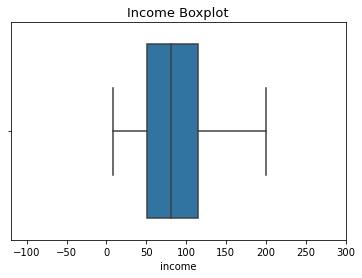

In [20]:
# Plotting the income boxplot again to check 
# if the outlier have been successfully removed
sns.boxplot(x=personal_loan_df["income"])
plt.xlim([-120, 300])

# Title table
plt.title('Income Boxplot', fontsize=13)
# The output gurantees that outliers from income has been removed

Text(0.5, 1.0, 'Mortgage Amount Boxplot')

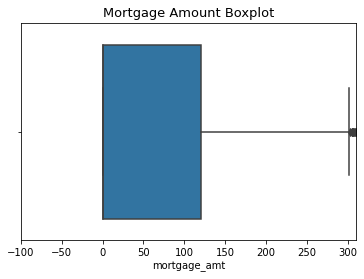

In [21]:
# The mortgage_amt box-plot seemed to still contain some outliers
sns.boxplot(x=personal_loan_df["mortgage_amt"])
plt.xlim([-100, 310])

# Title table
plt.title('Mortgage Amount Boxplot', fontsize=13)

In [22]:
# The mortage_amt box-plot had more outliers as well
# Thus to remove that the same process has been implemented as income with mortage_amt
#  This code is ensuring that all the values before 0 and after 303 to be deleted
#  So, after the removal of any existing values before and after the min and max value
#  the new datatset is being stored in mortage_amt_df
mortgage_amt_df=personal_loan_df[personal_loan_df['mortgage_amt'].between(0,303)]
personal_loan_df = mortgage_amt_df

Text(0.5, 1.0, 'Mortgage Amount Boxplot')

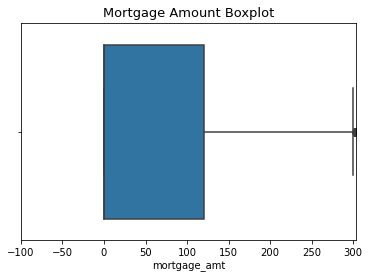

In [23]:
# The mortgage_amt box-plot seemed to still contain some outliers
sns.boxplot(x=personal_loan_df["mortgage_amt"])
plt.xlim([-100, 303])

# Title table
plt.title('Mortgage Amount Boxplot', fontsize=13)

# There are more outliers found
# Hence will repeat the process again

In [24]:
mortgage_amt_df_two=personal_loan_df[personal_loan_df['mortgage_amt'].between(0,300)]
personal_loan_df = mortgage_amt_df_two

Text(0.5, 1.0, 'Mortgage Amount Boxplot')

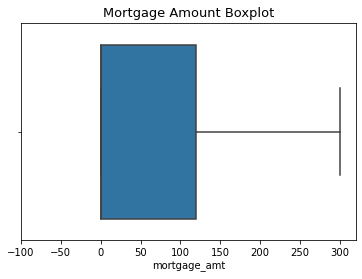

In [25]:
# The mortgage_amt box-plot seemed to still contain some outliers
sns.boxplot(x=personal_loan_df["mortgage_amt"])
plt.xlim([-100, 320])

# Title table
plt.title('Mortgage Amount Boxplot', fontsize=13)

# Now, the mortgage_amt is cleaned.

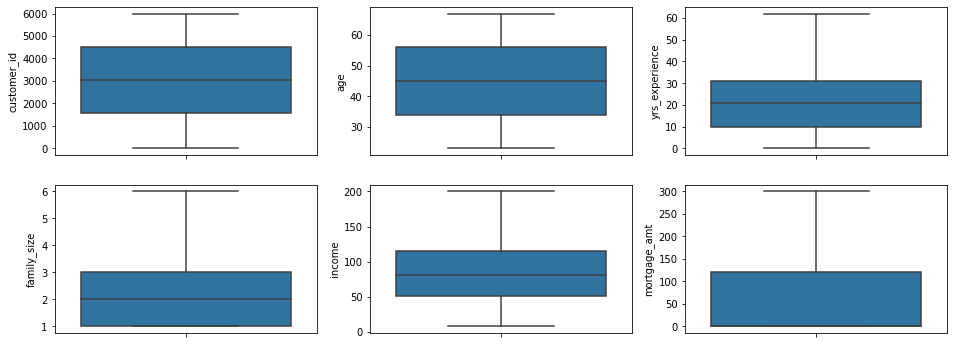

In [26]:
fig, ax = plt.subplots(2,3, figsize=(16,6))  # 2 rows and 4 columns

# Row 0
ax1 = sns.boxplot(y=personal_loan_df["customer_id"], ax=ax[0,0]) # row 0, col 0
ax2 = sns.boxplot(y=personal_loan_df["age"], ax=ax[0,1]) 
ax3 = sns.boxplot(y=personal_loan_df["yrs_experience"], ax=ax[0,2])

# Row 1
ax4 = sns.boxplot(y=personal_loan_df["family_size"], ax=ax[1,0])
ax5 = sns.boxplot(y=personal_loan_df["income"], ax=ax[1,1])
ax6 = sns.boxplot(y=personal_loan_df["mortgage_amt"], ax=ax[1,2])

In [27]:
personal_loan_df.head(20)

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815.0,40.0,9.0,3.0,Graduate,60.0,0.0,yes,1.7,0,0,yes,0
1,5737.0,65.0,27.0,4.0,Advanced or Professional,36.0,90.0,no,0.0,0,0,yes,0
3,4734.0,29.0,14.0,1.0,Undergraduate,52.0,0.0,no,0.0,1,0,yes,0
4,2551.0,43.0,23.0,4.0,Graduate,33.0,0.0,no,0.0,0,0,yes,0
5,4491.0,44.0,18.0,3.0,Advanced or Professional,49.0,0.0,no,0.0,0,0,yes,0
6,706.0,42.0,16.0,4.0,Advanced or Professional,23.0,0.0,no,0.0,0,0,yes,0
7,5327.0,64.0,38.0,2.0,Undergraduate,112.0,0.0,no,0.0,0,0,no,0
8,5269.0,43.0,7.0,4.0,Graduate,28.0,83.0,yes,0.9,0,0,yes,0
9,1918.0,25.0,8.0,1.0,Undergraduate,47.0,0.0,no,0.0,0,0,no,0
11,4359.0,25.0,15.0,2.0,Advanced or Professional,40.0,0.0,no,0.0,0,0,yes,0


In [28]:
# Saving the object as a pickle in a file 
joblib.dump(personal_loan_df, 'personal_loan_cleaned.pkl') 

['personal_loan_cleaned.pkl']